# Multiple regression
multiple predictors to one predictant

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

In [9]:
import numpy as np
import pandas as pd
from scipy import signal, linalg
import matplotlib.pyplot as plt

In [24]:
# Read Nino indices
f = 'data/era5_nino.csv'
nino = pd.read_csv(f, index_col=0, parse_dates=True)

# Read T2m data
f = 'data/era5_monthly_t2m_points.csv'
df = pd.read_csv(f, index_col=0, parse_dates=True)

# Estimate anomaly
dfa = df.groupby(df.index.month).transform(lambda x: x-x.mean())

# Detrend
data = signal.detrend(dfa.values, axis=-1)

# Define predictor and predictand
x = nino[['nino3', 'nino4']].values
y = data[:, 1]
n = x.shape[0]

print(f'{x.shape = :}')
print(f'{y.shape = :}')

x.shape = (1008, 2)
y.shape = (1008,)


$$y = Ap = \begin{bmatrix} x_1 & x_2 & 1 \end{bmatrix} \begin{bmatrix} \beta_1 \\ \beta_2 \\ \beta_0 \end{bmatrix} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

In [25]:
A = np.hstack([x, np.ones((n, 1))])
print(f'{A.shape = :}')
print(A[:5])

A.shape = (1008, 3)
[[0.77482826 0.49944904 1.        ]
 [0.91584975 0.6616926  1.        ]
 [0.96427315 0.78748566 1.        ]
 [0.48696518 0.6775541  1.        ]
 [1.1274626  0.87392026 1.        ]]


In [26]:
p, res, rnk, s = linalg.lstsq(A, y)

print(f'p = {p}')
print(f'Sums of squared residuals = {res}')
print(f'Rank of matrix A (number of linearly independent columns): {rnk}')
print(f'Singular values of A: {s}')

p = [ 1.68140215e-01 -2.26603304e-01 -1.55595957e-07]
Sums of squared residuals = 1568.9124786021625
Rank of matrix A (number of linearly independent columns): 3
Singular values of A: [31.74901573 29.80843068  9.99211823]


In [27]:
# Reconstruction
y_recon = A @ p

# Residual
y_res = y - y_recon

# sum of squared residuals
print(f'Sums of squared residuals = {(y_res**2).sum()}')

Sums of squared residuals = 1568.9124786021625


In [28]:
print(f'y = {p[0]:.2f} Nino 3 + {+p[1]:.2f} Nino 4 + {+p[2]:.2f}')

y = 0.17 Nino 3 + -0.23 Nino 4 + -0.00


[Text(0.5, 0, 'Original'), Text(0, 0.5, 'Reconstructed')]

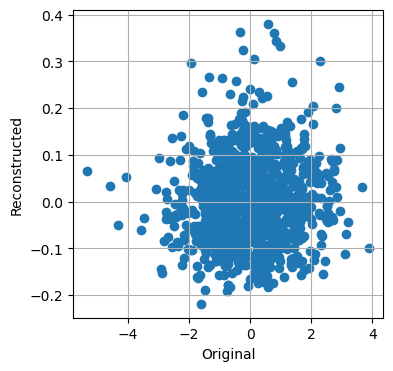

In [33]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(y, y_recon)
ax.grid()
ax.set(
    xlabel='Original',
    ylabel='Reconstructed',
)